# Questão 1

### (a) e (b)

In [1]:
function vandermonde(x, y)
    n = size(y)[1]
    V = zeros(n, n)
    for i = 1:n
        for j = 1:n
            V[i,j] = x[i]^(j-1)
        end
    end
    return V \ y
end

vandermonde (generic function with 1 method)

In [2]:
y = [ -4.0, 1.0, 8.5 ]

3-element Array{Float64,1}:
 -4.0
  1.0
  8.5

In [3]:
x = [ -2.0, 2.0, 6.0 ]

3-element Array{Float64,1}:
 -2.0
  2.0
  6.0

In [4]:
c = vandermonde(x, y)

3-element Array{Float64,1}:
 -1.8125
  1.25
  0.078125

In [5]:
f(x) = c[1] + c[2]x + c[3]x^2

f (generic function with 1 method)

In [6]:
using Plots

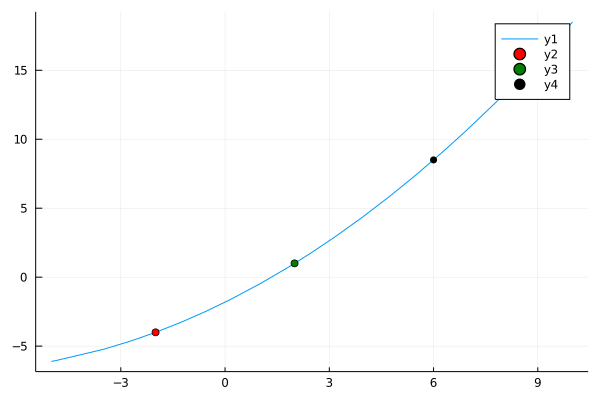

In [7]:
plot(f, -5, 10)
scatter!([x[1]],[y[1]], color="red")
scatter!([x[2]],[y[2]], color="green")
scatter!([x[3]],[y[3]], color="black")

### (c)

In [8]:
function c_question_func(x, y)
    V = zeros(3, 3)
    for i = 1:3
        for j = 1:3
            if j == 1
                V[i,j] = sin(x[i])
            elseif j == 2
                V[i,j] = x[i]^2
            else
                V[i,j] = x[i]^10
            end
        end
    end
    println(V)
    return V \ y[1:3]
end

c_question_func (generic function with 1 method)

In [9]:
x = [ 1.0, 2.0, 3.0, 10.0 ]

4-element Array{Float64,1}:
  1.0
  2.0
  3.0
 10.0

In [10]:
y = [ 0, 5.0, 3.0, 4,2 ]

5-element Array{Float64,1}:
 0.0
 5.0
 3.0
 4.0
 2.0

In [11]:
c = c_question_func(x, y)

[0.8414709848078965 1.0 1.0; 0.9092974268256817 4.0 1024.0; 0.1411200080598672 9.0 59049.0]


3-element Array{Float64,1}:
 -2.125333006465878
  1.7886227877975842
 -0.00021672980201486718

In [12]:
f(x) = c[1]*sin(x) + c[2]x^2 + c[3]x^10

f (generic function with 1 method)

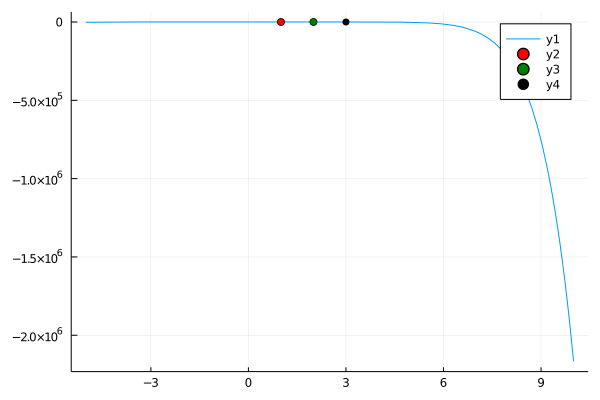

In [13]:
plot(f, -5, 10)
scatter!([x[1]],[y[1]], color="red")
scatter!([x[2]],[y[2]], color="green")
scatter!([x[3]],[y[3]], color="black")

# Questão 2

### (a)

In [14]:
function integral_trapezio(f, n, a, b)
    h = (b-a)/n
    total = 0
    for i = 1:n
        b = f(a)
        B = f(a + h)
        total += ((B+b)*h)/2
        a = a + h
    end
    
    return total
end

integral_trapezio (generic function with 1 method)

In [15]:
f(x) = sin(x)

f (generic function with 1 method)

O valor da integral $\int _0^{\pi }\sin \left(x\right)dx$ é $2$, vamos conferir se o algoritmo está correto se ele convergir para esse valor

In [16]:
integral_trapezio(f, 5, 0, π)

1.9337655980928052

In [17]:
integral_trapezio(f, 10, 0, π)

1.9835235375094546

In [18]:
integral_trapezio(f, 25, 0, π)

1.9973674125456298

In [19]:
integral_trapezio(f, 100, 0, π)

1.999835503887445

### (b)

In [20]:
integral_trapezio(f, 10000, 0, 2π) == 0

false

In [21]:
f(x) = x^3 - 5x

f (generic function with 1 method)

In [22]:
integral_trapezio(f, 100, -sqrt(5), sqrt(5))

-6.520825546196818e-15

In [23]:
# A integral de f(x) no intervalo -sqrt(5), sqrt(5) é igual a 0 pois a função é espelhada no eixo y
integral_trapezio(f, 100, -sqrt(5), sqrt(5)) == 0

false

Com 4 trapézios dá 0:

In [24]:
integral_trapezio(f, 4, -sqrt(5), sqrt(5)) == 0

true

Não é possível obter uma função não linear com mais de 4 trapézios que dê zero. Pois uma vez que não é linear, um trapézio em um dado intervalo vai ter um erro de aproximação da função real por mais que o $n$ seja muito grande. E por ser mais de 4 trapézios não cai no resultado em que os trapézios se anulam em uma derivada igual a 0 como mostrado acima.

### (c)

Para resolver a integral dupla irei usar a função de integral que usa a Regra do Trapézio e irei chamar ela duas vezes, tendo a segunda chamada usando o resultado da primeira

In [25]:
function integral_dupla(f, n, a, b, c, d)
    integral = integral_trapezio(f, n, a, b)
    f2(x) = integral
    return integral_trapezio(f2, n, c, d)
end

integral_dupla (generic function with 1 method)

Vamos tentar resolver a seguinte integral dupla $\int _0^{\pi \:}\int _0^{\pi }\sin \left(x\right)dx$, cujo valor é $2\pi$

In [26]:
f(x) = sin(x)

f (generic function with 1 method)

In [27]:
integral_dupla(f, 1000, 0, π, 0, π)

6.283180139465897

In [28]:
2 * π

6.283185307179586

# Questão 3

In [29]:
x_val = [1.0 3.0]

1×2 Array{Float64,2}:
 1.0  3.0

In [30]:
y_val = [2.0 4.0]

1×2 Array{Float64,2}:
 2.0  4.0

In [31]:
func_val = [700.0, 500.0, 500.0, 600.0]

4-element Array{Float64,1}:
 700.0
 500.0
 500.0
 600.0

In [32]:
y_interpolacao(x, y) = func_val[1]*( (x-x_val[2])/(x_val[1]-x_val[2]) )*( (y-y_val[2])/(y_val[1]-y_val[2]) ) +
                       func_val[2]*( (x-x_val[2])/(x_val[1]-x_val[2]) )*( (y-y_val[1])/(y_val[2]-y_val[1]) ) +
                       func_val[3]*( (x-x_val[1])/(x_val[2]-x_val[1]) )*( (y-y_val[2])/(y_val[1]-y_val[2]) ) +
                       func_val[4]*( (x-x_val[1])/(x_val[2]-x_val[1]) )*( (y-y_val[1])/(y_val[2]-y_val[1]) )

y_interpolacao (generic function with 1 method)

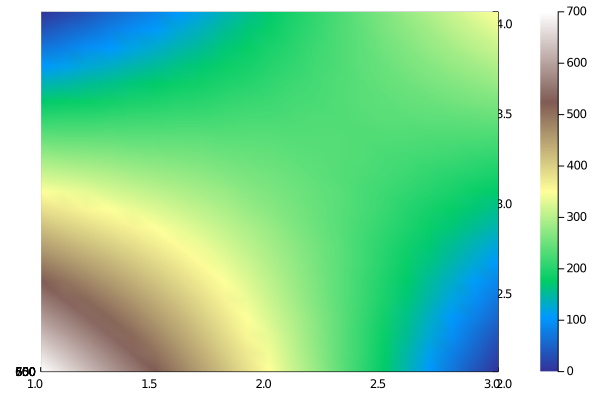

In [33]:
x = 1.0:.1:3.0
y = 2.0:.1:4.0

surface(x,y,y_interpolacao,color=:terrain,clim=(0, 700), camera = (0,90))

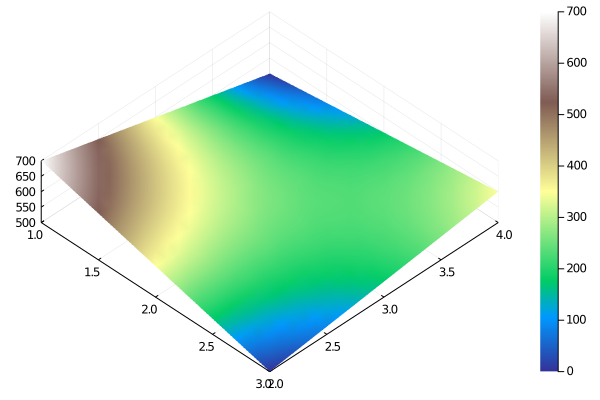

In [34]:
surface(x,y,y_interpolacao,color=:terrain,clim=(0, 700), camera = (45,80))

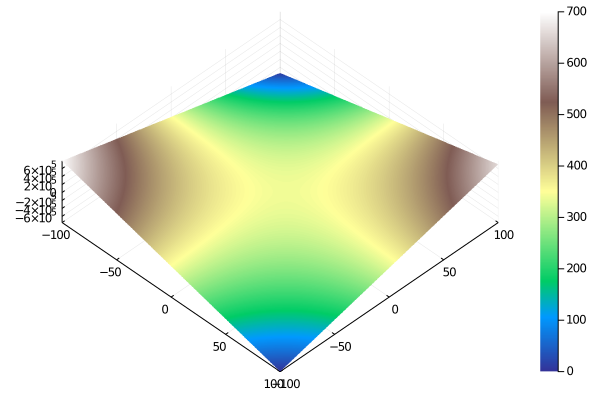

In [35]:
x = -100.0:.1:100.0
y = -100.0:.1:100.0
surface(x,y,y_interpolacao,color=:terrain,clim=(0, 700), camera = (45,80))

Podemos ver pelos plots que os pontos de máximos são os pontos com $x,y\to -\infty$ e $x,y\to \infty$, pois cada vez mais eles crescem

Agora para descobrirmos nossos mínimo vamos calcular as derivadas parciais e igualar a zero

Nossa derivada parcial $\frac{\partial }{\partial x}$ é igual à $25(-70+23y)$, igualando a zero e isolando o $y$ temos que seu valor é $3,043478$

Nossa derivada parcial $\frac{\partial }{\partial y}$ é igual à $25(-47+23x)$, igualando a zero e isolando o $x$ temos que seu valor é $2,043478$

In [36]:
y_interpolacao(2.043478, 3.043478)

572.9678752363